![University of Tehran](./img/UT.png)
#   <font color='red'><center>AI CA 4<center></font> 
## <center>Dr. Fadaei<center>
### <center>Daniyal Maroufi<center>
### <center>810098039<center>


## Aim

This assignment aims to use the Scikit-Learn python library to build three classifiers, K-Nearest-Neighbors, Decision-Tree, and Random Forests, and optimize the hyperparameters.


# Phase 0 - Exploratory Data Analysis(EDA)

In [30]:
import pandas as pd
from numpy import *
import math
import copy
import operator
import matplotlib.pyplot as plt
import seaborn as sns
from bidi.algorithm import get_display
import sklearn
from sklearn import feature_selection
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import (CountVectorizer, 
                                             TfidfVectorizer,
                                             TfidfTransformer)
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor


In [4]:
data = pd.read_csv("dataset.csv")
data

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Blockhead,"Cheer up, You're Not Dead Yet",44.0,0.00621,0.711,285987.0,0.6210,0.029700,G,0.1590,-7.429,Major,0.0382,142.065,0.6070,Jazz
1,FloFilz,Corners,34.0,0.34700,0.729,103703.0,0.5150,0.006920,C,0.1270,-10.147,Major,0.1840,79.969,0.2870,Jazz
2,Bonobo,We Could Forever,51.0,0.01810,0.669,NaN,0.8850,0.880000,G,0.2650,-7.080,Minor,0.0378,NaN,0.6360,Jazz
3,Nils Landgren,A Child Is Born,39.0,0.91800,0.484,228733.0,0.0693,0.000069,F,0.1390,-15.542,Major,0.0346,82.707,0.2060,Jazz
4,Masayoshi Takanaka,Samba Pati,36.0,0.03450,0.473,342867.0,0.8230,0.446000,G,0.3060,-6.625,Major,0.0630,104.694,0.3830,Jazz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,Wolfgang Amadeus Mozart,"Die Zauberflöte, K. 620: Wie stark ist nicht d...",22.0,0.91100,0.326,368640.0,0.1330,0.000000,G,0.1300,-20.493,Major,0.0557,92.090,0.2060,Classical
29996,New York Philharmonic,"Symphony No. 2 in D Major, Op. 73: II. Adagio ...",26.0,0.96500,0.126,514213.0,0.2040,0.869000,B,0.1060,-16.474,Major,0.0395,82.437,0.0387,Classical
29997,Georges Bizet,"Bizet: Carmen, WD 31, Act 1 Scene 4: No. 5, Ha...",54.0,0.97600,0.363,262147.0,0.1150,0.000000,D,0.0992,-17.325,Major,0.0689,NaN,0.2310,Classical
29998,Edvard Grieg,"Peer Gynt-Suite Nr. 1, Op. 46: I. Morning",42.0,0.98500,0.123,259573.0,0.0174,0.906000,E,0.1250,-23.671,Major,0.0408,71.705,0.0352,Classical


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       28506 non-null  object 
 1   track_name        30000 non-null  object 
 2   popularity        30000 non-null  float64
 3   acousticness      30000 non-null  float64
 4   danceability      30000 non-null  float64
 5   duration_ms       26990 non-null  float64
 6   energy            30000 non-null  float64
 7   instrumentalness  30000 non-null  float64
 8   key               30000 non-null  object 
 9   liveness          30000 non-null  float64
 10  loudness          30000 non-null  float64
 11  mode              30000 non-null  object 
 12  speechiness       30000 non-null  float64
 13  tempo             27067 non-null  float64
 14  valence           30000 non-null  float64
 15  music_genre       30000 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

In [6]:
data.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,30000.000000,30000.000000,30000.000000,2.699000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,27067.000000,30000.000000
mean,47.769533,0.359661,0.540929,2.466460e+05,0.556709,0.180807,0.183610,-10.079862,0.083861,117.559824,0.446563
std,14.512665,0.364182,0.181719,1.126005e+05,0.277856,0.329365,0.150733,6.953936,0.093366,30.719934,0.248745
min,0.000000,0.000001,0.059600,1.550900e+04,0.000792,0.000000,0.015700,-47.046000,0.022300,34.347000,0.000000
25%,39.000000,0.029600,0.423000,1.904930e+05,0.361000,0.000000,0.095800,-12.057250,0.035000,92.340000,0.243000
50%,49.000000,0.205000,0.553000,2.245600e+05,0.602000,0.000089,0.122000,-7.623000,0.045100,115.491000,0.435000
75%,57.000000,0.710000,0.671000,2.726670e+05,0.786000,0.125250,0.222000,-5.429750,0.080300,139.817500,0.639000
max,99.000000,0.996000,0.977000,3.195440e+06,0.998000,0.994000,0.996000,1.342000,0.941000,219.331000,0.985000


In [28]:

for column in data.columns:
    print(data[column].isnull().sum()/data.shape[0],"% of the column",column,"is missing.")

0.0498 % of the column artist_name is missing.
0.0 % of the column track_name is missing.
0.0 % of the column popularity is missing.
0.0 % of the column acousticness is missing.
0.0 % of the column danceability is missing.
0.10033333333333333 % of the column duration_ms is missing.
0.0 % of the column energy is missing.
0.0 % of the column instrumentalness is missing.
0.0 % of the column key is missing.
0.0 % of the column liveness is missing.
0.0 % of the column loudness is missing.
0.0 % of the column mode is missing.
0.0 % of the column speechiness is missing.
0.09776666666666667 % of the column tempo is missing.
0.0 % of the column valence is missing.
0.0 % of the column music_genre is missing.


In [44]:
numeric_columns=['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

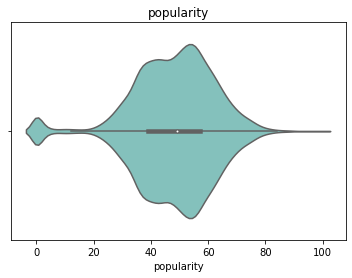

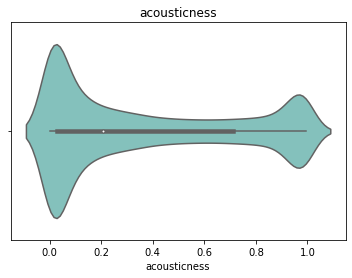

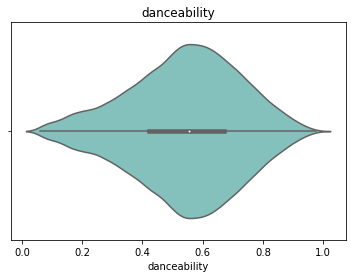

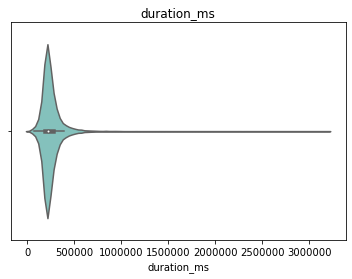

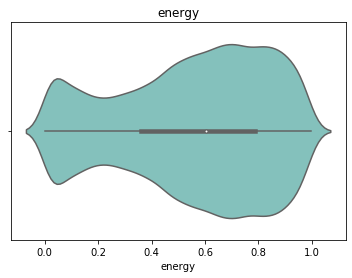

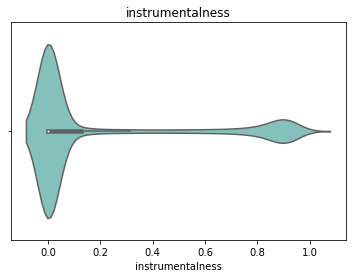

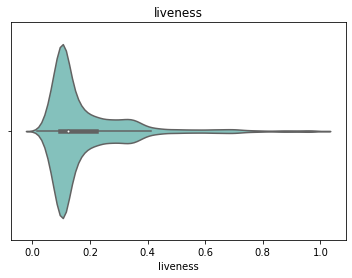

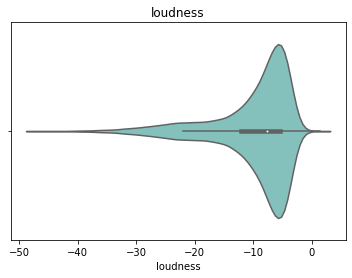

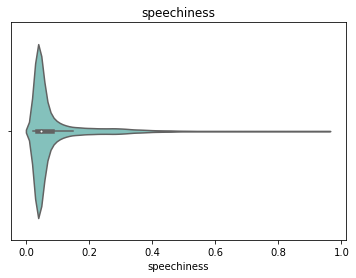

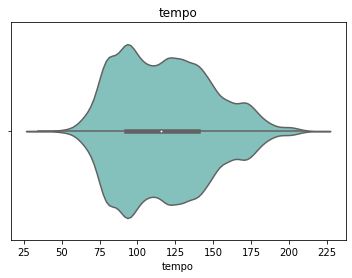

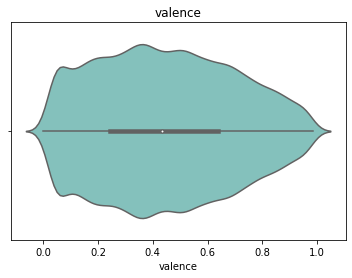

In [45]:
for column in numeric_columns:
    sns.violinplot(x=column,data=data,palette="GnBu") 
    plt.title(column)
    plt.show()


The duration and speechiness follow the normal distribution, and other features don't follow any specific distribution.

# Phase 2 - Preprocessing

## Methods of Handling Missing Values
[Source](https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e)

### Delete Rows with Missing Values
#### Pros:
A model trained to remove all missing values creates a robust model.
#### Cons:
Loss of a lot of information.
Works poorly if the percentage of missing values is excessive compared to the complete dataset.

### Impute missing values with Mean/Median
#### Pros:
Prevent data loss which results in the deletion of rows or columns
It works well with a small dataset and is easy to implement.
#### Cons:
Works only with continuous numerical variables.
Can cause data leakage
Do not factor in the covariance between features.

### Imputation method for categorical columns using the mode
#### Pros:
Prevent data loss which results in the deletion of rows or columns
It works well with a small dataset and is easy to implement.
Negates the loss of data by adding a unique category
#### Cons:
Works only with categorical variables.
The addition of new features to the model while encoding may result in poor performance

### Prediction of missing values
#### Pros:
Gives a better result than earlier methods
Takes into account the covariance between the missing value column and other columns.
#### Cons:
Considered only as a proxy for the actual values


## Handling Missing Data

As the value of the artist-name columns is not numeric, it would be better to remove the rows in which the value of this particular column is NaN. 

In [47]:
data=data[data['artist_name'].notna()]

And for duration_ms, and tempo columns as are numeric, we replace the missing values with the mean of that column.

In [49]:
columns_mean=data.mean()
data['duration_ms'] = data['duration_ms'].fillna(columns_mean['duration_ms'])
data['tempo'] = data['tempo'].fillna(columns_mean['tempo'])

<ipython-input-49-8c98fa6ca5a2>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  columns_mean=data.mean()
<ipython-input-49-8c98fa6ca5a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['duration_ms'] = data['duration_ms'].fillna(columns_mean['duration_ms'])
<ipython-input-49-8c98fa6ca5a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

## Normalization

Here we normalize the data by replacing $x$ with $ (x-\mu)/\sigma $ where $\mu$ is the mean of the particular column and $\sigma$ is the standard deviation. The advantages of using Normalization are ([Source](https://www.geeksforgeeks.org/advantages-and-disadvantages-of-normalization/)):

- A more modest information base can be kept up as standardization disposes of the copy information. Generally speaking size of the information base is diminished thus.
- Better execution is guaranteed which can be connected to the above point. As information bases become lesser in size, the goes through the information turns out to be quicker and more limited in this way improving reaction time and speed.
- Narrower tables are conceivable as standardized tables will be tweaked and will have lesser segments which considers more information records per page.
- Fewer files per table guarantees quicker support assignments (file modifies).
- Also understands the choice of joining just the tables that are required.

In [52]:
def normalize_column(df,column_name):
    mean_ = df[column_name].mean()
    std_ = df[column_name].std()
    df[column_name] = (df[column_name] - mean_)/std_
    return df

In [53]:
data_normal=data.copy()
for columns_name in numeric_columns:
    data_normal=normalize_column(data_normal,columns_name)


## Catrgorical Features

In machine learning, we work with numbers, not texts, So to perform machine learning algorithms, we need to change categorical features to numerical features. There are two approaches to encoding categorical features.

Approach 1: Label Encoding
Label encoding is simply converting each value in a column to a number. For example, the artist_name column contains many different values. We can select a number for each artist_name and map the categorical values to numeric values.

Approach 2: One Hot Encoding
Label encoding has the advantage that it is straightforward, but it has the disadvantage that the algorithms can misinterpret the numeric values. For example, the value of zero is less than four but does that correspond to the data set in real life? Does an artist have 4X more weight than another one?

A common alternative approach is called one-hot encoding (but it also goes by several different names shown below). Despite the other terms, the basic strategy is to convert each category value into a new column and assigns a 1 or 0 (True/False) value to the column. This benefits from not weighing a value improperly but has the downside of adding more columns to the data set ([Source](https://pbpython.com/categorical-encoding.html)).
